# Learning to do Model Selection
In this lab, you will learn how to do model selection while strenghtening your knowledge about regularization. For this purpose, we will be using the [Digits Dataset](https://scikit-learn.org/1.5/auto_examples/datasets/plot_digits_last_image.html) embedded within scikit-learn.

The goal is to train a classifier to discriminate between small digits (0 -4) and large digits (5-9).

In [ ]:
# Loading the necessary libraries
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score

## Loading the digits dataset and preparation

In [ ]:
X, y = datasets.load_digits(return_X_y=True)
X = StandardScaler().fit_transform(X)

In the previous cell, we have loaded the digits dataset, followed by scaling the features of the input samples. Answer the following questions:

1. How many samples does the dataset have?
2. How many different values in y are there?
3. Investigate why we scale the features and what type of scaling does StandardScaler performs.

Use the cell below to implement the code to answer questions 1 and 2.

In [ ]:
# Question 1: Number of samples
num_samples = len(X)

# Question 2: Number of unique values in y
num_classes = len(np.unique(y))

print(f"Number of samples in the dataset: {num_samples}")
print(f"Number of different values in y: {num_classes}")

Number of samples in the dataset: 1797
Number of different values in y: 10


Q3.


Scaling ensures that all features **contribute equally** to the model by standardizing their range, **preventing features with larger values from dominating**.

*StandardScaler* standardizes features by subtracting the mean and dividing by the standard deviation, resulting in data with a mean of 0 and a standard deviation of 1.

standardScaler(x)= (x-μ)/σ

Using the original labels, create new labels (y_new) that reflects the classification problem we want to solve: discriminate between small and large digits:

In [ ]:
# classify small against large digits

def classify_digit(digit):
    return 0 if digit <= 4 else 1

y_new = np.array([classify_digit(d) for d in y])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 1437
Testing set size: 360


We now split the data into training and testing. We will leave 20% of the data for testing.

**Question:** What property of a model is measure with the testing set?

Your answer: The testing set measures the generalization ability of a model — how well the model performs on unseen data. This is a critical evaluation metric to ensure the model isn't overfitting.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, random_state=42)

We will use logistic regression with regularization to solve our classification problem. In a first experiment, we will use 'L2' regularization.

In [ ]:
model_l2 = LogisticRegression(penalty="l2", tol=0.01, solver="saga")

Use the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to understand the role of each parameter. Provide your answer below.

**penalty:**

Specifies the regularization technique used to prevent overfitting by adding a penalty term to the loss function.
"l2" means Ridge regularization, which penalizes large weights by adding the squared sum of coefficients to the cost function.

**tol:**

The tolerance for the optimization algorithm. It determines the stopping criteria.
Smaller values result in more precise optimization but increase computational cost.

**solver:**

Specifies the algorithm used for optimization.
"saga" is a fast and robust solver that supports both l1 and l2 regularization and works well with large datasets and sparse data.

Your task will be to choose the best regularization hyperparameter ($\lambda$ in the course), i.e. do model selection.

Define a vector lambda_values with a range of hyper-parameters to evaluate. Consider, at the least, the following values: 0.001, 0.01, 0.1, 1, 10, 100.

In [ ]:
# Define the parameter grid for lambda

lambda_values = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'C': [1 / l for l in lambda_values]}

**Important:** Scikit-learn uses the hyper-parameter C for the regularization. This is equivalent to C=1/lambda, where lambda is the expression seen in the course.

To choose the right value, you will do cross-validation with the available training dataset.

**Question:** According to the slides you reviewed, what is a typical value for K in K-fold cross-validation?

 A typical value for K in K-fold cross-validation is 5 as these values strike a balance between computational efficiency and reliable model evaluation.

Use that value to initialize the KFold class below:

In [ ]:
# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds)

You will evaluate over K folds each of the models corresponding to the hyperparameters defined in lambda_grid.

**Your task:** Comment every line of code that has not been commented in the code snippet below:

In [ ]:
accuracy_scores = [] # Initialize a list to store accuracy scores for each C value

for a_lambda in param_grid['C']: # Perform cross-validation for each value of C in the grid
    print('Now testing for lambda: ', a_lambda)
    C = a_lambda # Scikit-learn's regularization hyperparameter is equivalent to 1/lambda from the course.
    model_l2.set_params(C=C) # Update the model's C parameter for the current lambda
    fold_accuracies = [] # Stores the accuracy of the trained model for each fold

    for train_index, val_index in kf.split(X_train): # Split the training data into K folds
        X_ttrain, X_val = X_train[train_index], X_train[val_index] # Extract the training and validation data for the current fold
        y_ttrain, y_val = y_train[train_index], y_train[val_index] # Extract the corresponding labels for the current fold

        model_l2.fit(X_ttrain, y_ttrain) # Train the model on the training data of the current fold
        y_pred = model_l2.predict(X_val) # Predict the labels on the validation data
        accuracy = accuracy_score(y_val, y_pred) # Calculate the accuracy of the model on the validation set
        print('accuracy:', accuracy) # Print the accuracy for the current fold
        fold_accuracies.append(accuracy) # Append the accuracy to the list of fold accuracies

    average_accuracy = sum(fold_accuracies) / num_folds # Calculate the average accuracy over all folds
    print('average of fold', average_accuracy) # Print the average accuracy for the current lambda
    accuracy_scores.append(average_accuracy) # Append the average accuracy to the list of accuracy scores

Now testing for lambda:  1000.0
accuracy: 0.9131944444444444
accuracy: 0.8854166666666666
accuracy: 0.8571428571428571
accuracy: 0.9198606271777003
accuracy: 0.8571428571428571
average of fold 0.8865514905149052
Now testing for lambda:  100.0
accuracy: 0.9131944444444444
accuracy: 0.8854166666666666
accuracy: 0.8571428571428571
accuracy: 0.9198606271777003
accuracy: 0.8571428571428571
average of fold 0.8865514905149052
Now testing for lambda:  10.0
accuracy: 0.9131944444444444
accuracy: 0.8854166666666666
accuracy: 0.8571428571428571
accuracy: 0.9198606271777003
accuracy: 0.8571428571428571
average of fold 0.8865514905149052
Now testing for lambda:  1.0
accuracy: 0.9131944444444444
accuracy: 0.8854166666666666
accuracy: 0.8571428571428571
accuracy: 0.9198606271777003
accuracy: 0.8571428571428571
average of fold 0.8865514905149052
Now testing for lambda:  0.1
accuracy: 0.9097222222222222
accuracy: 0.8923611111111112
accuracy: 0.8501742160278746
accuracy: 0.9233449477351916
accuracy: 0.8

Using the vector accuracy_scores, determine which value of lambda leads to the best model:

In [ ]:
# Find the best lambda value
best_lambda_l2 = param_grid['C'][np.argmax(accuracy_scores)]
best_accuracy_l2 = max(accuracy_scores)

print("Best lambda:", best_lambda_l2)
print("Best accuracy:", best_accuracy_l2)

# Train the final model with the best lambda parameter
best_model_l2 = LogisticRegression(C=best_lambda_l2, penalty="l2", tol=0.01, solver="saga")
best_model_l2.fit(X_train, y_train)

Best lambda: 1000.0
Best accuracy: 0.8865514905149052


LogisticRegression(C=1000.0, solver='saga', tol=0.01)

The value of lambda that leads to the best model is 100.

Using the chosen model, check its generalization error using the test set. Print the accuracy:

In [ ]:
y_pred = best_model_l2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9138888888888889


### L1 regularization
Now, we will do a similar exercise using Logistic Regression with L1 regularization:

In [ ]:
model_l1 = LogisticRegression(penalty="l1", tol=0.01, solver="saga")

Use the code used to cross-validate Logistic regression with L2 regularization and choose the best model, do the same to choose the best model when using the L1 regularization.

In [24]:
accuracy_scores = [] # Reinitialize the list to store accuracy scores for L1

for a_lambda in param_grid['C']: # Perform cross-validation for each value of C in the grid
    print('Now testing for lambda: ', a_lambda)
    C = a_lambda # Scikit-learn's regularization hyperparameter is equivalent to 1/lambda from the course.
    model_l1.set_params(C=C) # Update the model's C parameter for the current lambda
    fold_accuracies = [] # Stores the accuracy of the trained model for each fold

    for train_index, val_index in kf.split(X_train): # Split the training data into K folds
        X_ttrain, X_val = X_train[train_index], X_train[val_index] # Extract the training and validation data for the current fold
        y_ttrain, y_val = y_train[train_index], y_train[val_index] # Extract the corresponding labels for the current fold

        model_l1.fit(X_ttrain, y_ttrain) # Train the model on the training data of the current fold
        y_pred = model_l1.predict(X_val) # Predict the labels on the validation data
        accuracy = accuracy_score(y_val, y_pred) # Calculate the accuracy of the model on the validation set
        print('accuracy:', accuracy) # Print the accuracy for the current fold
        fold_accuracies.append(accuracy) # Append the accuracy to the list of fold accuracies

    average_accuracy = sum(fold_accuracies) / num_folds # Calculate the average accuracy over all folds
    print('average of fold', average_accuracy) # Print the average accuracy for the current lambda
    accuracy_scores.append(average_accuracy) # Append the average accuracy to the list of accuracy scores

# Find the best lambda value for L1 regularization
best_lambda_l1 = param_grid['C'][np.argmax(accuracy_scores)]
best_accuracy_l1 = max(accuracy_scores)
print("Best lambda for L1 regularization:", best_lambda_l1)
print("Best accuracy for L1 regularization:", best_accuracy_l1)

# Train the final model with the best lambda parameter for L1 regularization
best_model_l1 = LogisticRegression(C=best_lambda_l1, penalty="l1", tol=0.01, solver="saga")
best_model_l1.fit(X_train, y_train)

# Evaluate the final L1 model on the test set
y_pred = best_model_l1.predict(X_test)
final_accuracy_l1 = accuracy_score(y_test, y_pred)
print("Final Accuracy for L1 regularization: ", final_accuracy_l1)

Now testing for lambda:  1000.0
accuracy: 0.9131944444444444
accuracy: 0.8819444444444444
accuracy: 0.8571428571428571
accuracy: 0.9163763066202091
accuracy: 0.8571428571428571
average of fold 0.8851601819589623
Now testing for lambda:  100.0
accuracy: 0.9131944444444444
accuracy: 0.8819444444444444
accuracy: 0.8571428571428571
accuracy: 0.9198606271777003
accuracy: 0.8571428571428571
average of fold 0.8858570460704607
Now testing for lambda:  10.0
accuracy: 0.9131944444444444
accuracy: 0.8819444444444444
accuracy: 0.8571428571428571
accuracy: 0.9198606271777003
accuracy: 0.8571428571428571
average of fold 0.8858570460704607
Now testing for lambda:  1.0
accuracy: 0.9131944444444444
accuracy: 0.8854166666666666
accuracy: 0.8571428571428571
accuracy: 0.9163763066202091
accuracy: 0.8571428571428571
average of fold 0.8858546264034068
Now testing for lambda:  0.1
accuracy: 0.8888888888888888
accuracy: 0.8819444444444444
accuracy: 0.8536585365853658
accuracy: 0.9024390243902439
accuracy: 0.8

**Important:** You should not use the generalization performance of each of the models (L1 vs L2) to do a choice among them. You would need a cross-validation procedure for that matter.

## Comparing the properties of each regularization strategy
We will now use the full training set to study some of the properties of each regularization strategy.

In the code snippet below, you will be training 3 different models per regularization strategy and observing how these affect the weights of the model.

**Your task:** Comment the lines of code that do not have any comments.

As a reminder, the parameter C in scikit-learn is equivalent to C=1/lambda, where lambda is the regularization hyperparameter as seen in the course.

C=1.00
Sparsity with L1 penalty:                6.25%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.10
Score with L2 penalty:                   0.10
C=0.10
Sparsity with L1 penalty:                32.81%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.10
Score with L2 penalty:                   0.10
C=0.01
Sparsity with L1 penalty:                85.94%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.10
Score with L2 penalty:                   0.10


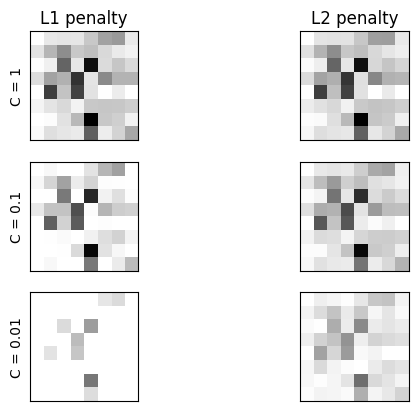

In [26]:
fig, axes = plt.subplots(3, 2) # Create a subplot grid with 3 rows and 2 columns

# Set regularization parameter
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)): # Loop over different values of the regularization parameter C
    # Increase tolerance for short training time
    model_l1 = LogisticRegression(C=C, penalty="l1", tol=0.01, solver="saga") # Initialize Logistic Regression with L1 penalty
    model_l2 = LogisticRegression(C=C, penalty="l2", tol=0.01, solver="saga") # Initialize Logistic Regression with L2 penalty

    model_l1.fit(X_train, y_train) # Fit the L1-penalized model on the training data
    model_l2.fit(X_train, y_train) # Fit the L2-penalized model on the training data

    coef_l1_LR = model_l1.coef_.ravel() # Extract and flatten the coefficients for the L1 model
    coef_l2_LR = model_l2.coef_.ravel() # Extract and flatten the coefficients for the L2 model

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100 # Calculate the percentage of zero coefficients for the L1 model
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100 # Calculate the percentage of zero coefficients for the L2 model

    #DO NOT COMMENT THE LINES BELOW
    print(f"C={C:.2f}")
    print(f"{'Sparsity with L1 penalty:':<40} {sparsity_l1_LR:.2f}%")
    print(f"{'Sparsity with L2 penalty:':<40} {sparsity_l2_LR:.2f}%")
    print(f"{'Score with L1 penalty:':<40} {model_l1.score(X, y):.2f}")
    print(f"{'Score with L2 penalty:':<40} {model_l2.score(X, y):.2f}")

    if i == 0: # Set titles for the first row of subplots
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_l2_LR]): # Loop through the axes and coefficients for visualization
        ax.imshow(
            np.abs(coefs.reshape(8, 8)), # Reshape and visualize the coefficients as an 8x8 grid
            interpolation="nearest", # Set interpolation for better visualization
            cmap="binary", # Use a binary color map
            vmax=1, # Set the maximum value for the color scale
            vmin=0, # Set the minimum value for the color scale
        )
        ax.set_xticks(()) # Remove x-axis ticks
        ax.set_yticks(()) # Remove y-axis ticks

    axes_row[0].set_ylabel(f"C = {C}") # Label the rows with the value of C

plt.show() # Display the plot


#Note: This code example has been adapted from scikit-learn

**Question:** Explain the differences between L1 and L2 regularization at the light of the observed plots. What are the obtained results saying?

L1 regularization induces high sparsity, meaning more coefficients are set to zero as the regularization strength (C) decreases, with values ranging from 6.25% to 85.94%. In contrast, L2 regularization (Ridge) maintains a constant sparsity of 4.69% regardless of C, as it doesn't set coefficients to zero but shrinks them.

Despite these differences in sparsity, the model performance (score) remains the same (0.10) for both L1 and L2 regularization, suggesting that sparsity does not impact performance significantly in this case.